In [1]:
import awkward as ak
import matplotlib.pyplot as plt
import os
import mplhep as hep
import hist

In [2]:
# plt.style.use(hep.style.CMS)

In [3]:
columns = ['goodjets.msoftdrop',
           'goodjets.trigger_mask',
           'goodjets.btag_count',
           'goodjets.pt',
           'goodjets.num_fatjets',
           'goodjets.GSscore',
          ]

In [4]:
data2017 = {}
# path2017 = '/project01/ndcms/cmoore24/skims/data_test/2017/'
path2017 = '/project01/ndcms/cmoore24/skims/analysis_skims/2017/nolepton/data/'

for i in os.listdir(path2017):
    data2017[i] = ak.from_parquet(f'{path2017}/{i}/*', columns=columns)
# data2017 = ak.flatten(ak.concatenate([data2017[i] for i in data2017]))
data2017 = ak.concatenate([data2017[i] for i in data2017])
len(data2017)

17554661

In [5]:
data2018 = {}
# path2018 = '/project01/ndcms/cmoore24/skims/data_test/2018/'
path2018 = '/project01/ndcms/cmoore24/skims/analysis_skims/2018/nolepton/data/'

for i in os.listdir(path2018):
    data2018[i] = ak.from_parquet(f'{path2018}/{i}/*', columns=columns)
# data2018 = ak.flatten(ak.concatenate([data2018[i] for i in data2018]))
data2018 = ak.concatenate([data2018[i] for i in data2018])
len(data2018)

24238572

In [6]:
data2017 = data2017[(data2017.goodjets.trigger_mask)
                        & (data2017.goodjets.pt <= 1200)
                        & (data2017.goodjets.btag_count == 0)
                        & (data2017.goodjets.num_fatjets < 3)
                    ]
len(data2017)

17554661

In [7]:
data2018 = data2018[(data2018.goodjets.trigger_mask)
                        & (data2018.goodjets.pt <= 1200)
                        & (data2018.goodjets.btag_count == 0)
                        & (data2018.goodjets.num_fatjets < 3)
                    ]
len(data2018)

24238572

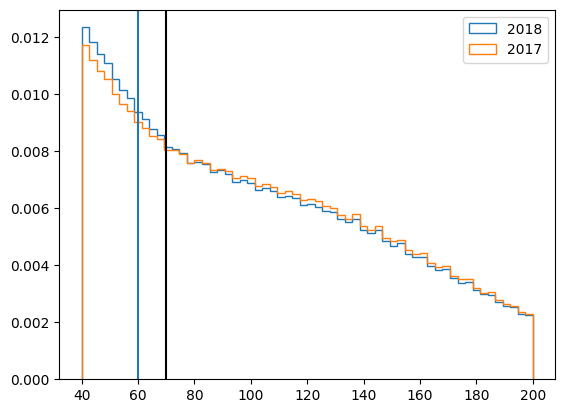

In [16]:
plt.hist(data2018.goodjets.msoftdrop, bins=60, histtype='step', label='2018',density=True, range=(40,200))
plt.hist(data2017.goodjets.msoftdrop, bins=60, histtype='step', label='2017',density=True, range=(40,200))
plt.legend()
plt.axvline(x=60)
plt.axvline(x=70, color='black')
plt.show()

In [17]:
17543265/24235300

0.7238724092542695

In [18]:
41.5/59.8

0.6939799331103679

In [19]:
path = '/project01/ndcms/cmoore24/skims/analysis_skims/2017/nolepton/mc'
dirs = os.listdir(path)
gg = {}
for i in dirs:
    if 'gg' in i:
        gg[i] = ak.from_parquet(f'{path}/{i}/*',columns=columns)

In [20]:
import json
scale_path = '/scratch365/cmoore24/training/hgg/batch2024/ml_results_checking'
with open(f'{scale_path}/subregion_event_totals.json', 'r') as f:
    totals = json.load(f)
with open(f'{scale_path}/my_xsecs.json', 'r') as f:
    xsecs = json.load(f)

xsecs2 = {}
for i in xsecs:
    if type(xsecs[i]) == dict:
        for j in xsecs[i]:
            xsecs2[j] = xsecs[i][j]
    else:
        xsecs2[i] = xsecs[i]
xsecs = xsecs2
xsecs['diboson_ww'] = xsecs['ww']
xsecs['diboson_wz'] = xsecs['wz']
xsecs['diboson_zz'] = xsecs['zz']
totals2 = {}
for i in totals:
    if type(totals[i]) == dict:
        for j in totals[i]:
            totals2[f'{i}_{j}'] = totals[i][j]
    else:
        totals2[i] = totals[i]
totals = totals2
totals['diboson_ww'] = totals['ww']
totals['diboson_wz'] = totals['wz']
totals['diboson_zz'] = totals['zz']

In [21]:
for i in gg:
    gg[i]['weights'] = ak.ones_like(gg[i].goodjets.msoftdrop) * (((41.5*(xsecs[i]*1000))/totals[i]))

In [22]:
ggh = gg['hgg']
vbf = gg['vbf_gg']
vh = ak.concatenate([gg[i] for i in gg if 'w' in i or 'z' in i])

In [15]:
# plt.figure(figsize=(8, 6))
    
# plt.hist(ggh.goodjets.msoftdrop,bins=40, weights=ggh.weights, histtype='step',label='ggH')
# plt.hist(vbf.goodjets.msoftdrop,bins=40, weights=vbf.weights, histtype='step',label='VBF')
# plt.hist(vh.goodjets.msoftdrop,bins=40, weights=vh.weights, histtype='step',label='VH')

# hep.cms.label('Preliminary', year='2017', data=False, fontsize=20)
# plt.ylabel('Events')
# plt.xlabel(r'$m_{SD}$')
# plt.legend()
# plt.show()

In [16]:
# plt.figure(figsize=(8, 6))

# range_set = (450,1200)
# plt.hist(ggh.goodjets.pt,bins=40, weights=ggh.weights, histtype='step',label='ggH', range=range_set)
# plt.hist(vbf.goodjets.pt,bins=40, weights=vbf.weights, histtype='step',label='VBF', range=range_set)
# plt.hist(vh.goodjets.pt,bins=40, weights=vh.weights, histtype='step',label='VH', range=range_set)

# hep.cms.label('Preliminary', year='2017', data=False, fontsize=20)
# plt.ylabel('Events')
# plt.yscale('log')
# plt.xlabel(r'$p_{T}$ (Log)')
# plt.xlim(450,1200)
# plt.legend()
# plt.show()

In [23]:
bkg = {}
for i in dirs:
    if 'gg' not in i:
        bkg[i] = ak.from_parquet(f'{path}/{i}/*',columns=columns)

In [24]:
for i in bkg:
    bkg[i]['weights'] = ak.ones_like(bkg[i].goodjets.msoftdrop) * (((41.5*(xsecs[i]*1000))/totals[i]))

In [25]:
qcd = ak.concatenate([bkg[i] for i in bkg if 'qcd' in i])
wqq = ak.concatenate([bkg[i] for i in bkg if 'wqq' in i])
zqq = ak.concatenate([bkg[i] for i in bkg if 'zqq' in i])
ttboosted = ak.concatenate([bkg[i] for i in bkg if 'ttboosted' in i])

In [26]:
to_plot = {}
for i in bkg:
    if ('qcd' not in i) and ('ttboosted' not in i) and ('wqq' not in i) and ('zqq' not in i):
        to_plot[i] = bkg[i]
to_plot['qcd'] = qcd
to_plot['wqq'] = wqq
to_plot['zqq'] = zqq
to_plot['ttboosted'] = ttboosted

to_plot['ww'] = to_plot['diboson_ww']
to_plot['wz'] = to_plot['diboson_wz']
to_plot['zz'] = to_plot['diboson_zz']

del(to_plot['diboson_ww'])
del(to_plot['diboson_wz'])
del(to_plot['diboson_zz'])
del(to_plot['singletop'])

In [27]:
sample_order = ['qcd','wqq','zqq','ttboosted','ww','wz','zz','hww','hbb']
to_plot = {k:to_plot[k] for k in sample_order}

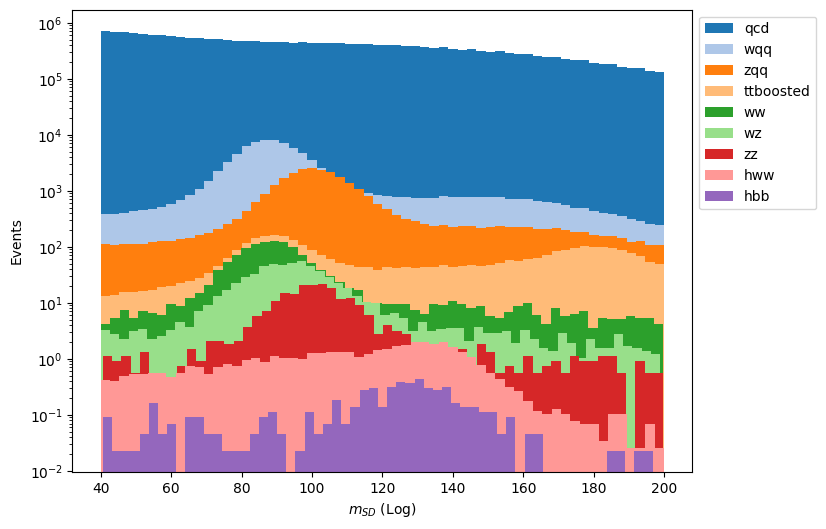

In [30]:
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=plt.cm.tab20.colors)

plt.figure(figsize=(8, 6))
for i in to_plot:
    plt.hist(to_plot[i].goodjets.msoftdrop,bins=60, weights=to_plot[i].weights, 
             histtype='barstacked',label=i, density=False)

plt.legend(bbox_to_anchor=(1,1))
plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'$m_{SD}$ (Log)')
plt.show()

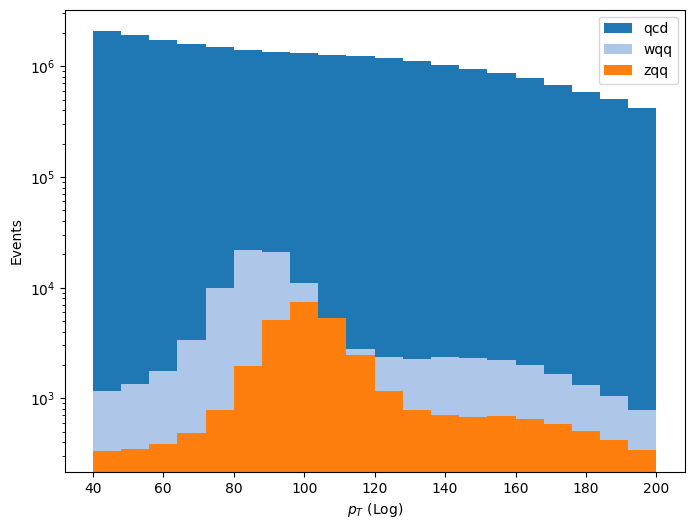

In [37]:
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=plt.cm.tab20.colors)

plt.figure(figsize=(8, 6))
for i in to_plot:
    if 'q' in i:
        plt.hist(to_plot[i].goodjets.msoftdrop,bins=20, weights=to_plot[i].weights, 
                 histtype='barstacked',label=i, density=False)

plt.legend(bbox_to_anchor=(1,1))
plt.yscale('log')
plt.ylabel('Events')
plt.xlabel(r'$p_{T}$ (Log)')
plt.show()